<>:53: SyntaxWarning: "is" with a literal. Did you mean "=="?


['name.jpg', 'student photo copy.jpeg']
D:/image/name.jpg
D:/image/student photo copy.jpeg
training complete
['name.jpg', 'student photo copy.jpeg']
D:/image/name.jpg
D:/image/student photo copy.jpeg
training complete


<ipython-input-2-dc9e8cd6116e>:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


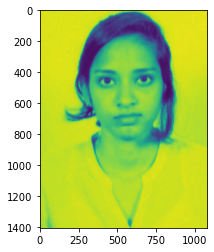

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import serial
import time
import pyttsx3
q = 1
x = 0
c = 0
m = 0
d = 0                      
while q <= 2:
    data_path = 'D:/image'
    onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
    print(onlyfiles)
    Training_data, Lebels = [], []
    for i, files in enumerate(onlyfiles):
        image_path = data_path +'/'+ onlyfiles[i]
        print(image_path)
        images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(images)
        Training_data.append(np.asarray(images, dtype=np.uint8))
        Lebels.append(i)

    Lebels = np.asarray(Lebels, dtype=np.int32)
    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(np.asarray(Training_data), np.asarray(Lebels))
    print("training complete")
    q += 1
face_classifier = cv2.CascadeClassifier('D:/xml/haarcascade_frontalface_default.xml')

model.save('face.h5')
model.save('model.tflite')

def speak(audio):
    engine.say(audio)
    engine.runAndWait()


engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
engine.setProperty("voice", voices[0].id)
engine.setProperty("rate", 140)
engine.setProperty("volume", 1000)


def face_detector(img, size=0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces is ():
        return img, []
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        roi = img[y:y + h, x:x + w]
        roi = cv2.resize(roi, (200, 200))

    return img, roi


cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()

    image, face = face_detector(frame)

    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        result = model.predict(face)
        if result[1] < 500:
            confidence = int((1 - (result[1]) / 300) * 100)
            display_string = str(confidence)
            cv2.putText(image, display_string, (100, 120), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0, 255, 0))

        if confidence >= 70:
            cv2.putText(image, "on", (250, 450), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0, 255, 255))
            cv2.imshow('face', image)
            x += 1
        else:
            cv2.putText(image, "off", (250, 450), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0, 255, 255))
            cv2.imshow('face', image)
            c += 1
    except:
        cv2.putText(image, "Face not found", (250, 450), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0, 255, 255))
        cv2.imshow('face', image)
        d += 1
        pass

    if cv2.waitKey(1) == 13 or x == 10 or c == 30 or d == 20:
        break
cap.release()
cv2.destroyAllWindows()
if x >= 5:
   
    speak("Face recognition complete..it is matching with database...welcome..sir..Light is openning for 3 seconds")
    
    time.sleep(4)
else:
    speak("face is not matching..please try again")


